Text(0.5, 1.0, 'log J(w) vs. #iterations')

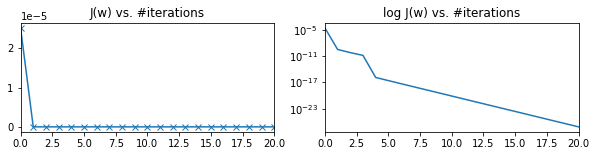

In [222]:
import numpy as np
import copy
import matplotlib.pyplot as plt
np.random.seed(1907)

K = 100

w0 = np.random.randn(K,1)
w = copy.deepcopy(w0)
w /= np.linalg.norm(w)

x = np.random.randn(K,1)

def Ga(y): return (y)**4
def nablaGa(y): return 4*(y)**3
def nablaGa2(y): return 12*(y)**2

def Gb(y): return np.log(np.cosh(y))
def nablaGb(y): return np.sinh(y)/np.cosh(y)
def nablaGb2(y): return 1-(np.sinh(y)/np.cosh(y))**2


def backtrack_linesearch(w, Dw):
    t = 1
    alpha =  0.3
    beta = 0.8
    
    numit = 0
    while (J(w+t*Dw) > J(w)+alpha*t*nablaJw(w).T@Dw):
        t *= beta
        numit += 1
        if numit > 100:
            break
    
    return t
            

use_first_fn = True

if use_first_fn:
    G = Ga
    nablaG = nablaGa
    nablaG2 = nablaGa2
else:
    G = Gb
    nablaG = nablaGb
    nablaG2 = nablaGb2

def J(w): return G(w.T@x)
def nablaJw(w): return nablaG(w.T@x)*x
def nablaJ2w(w): return nablaG2(w.T@x)*(x@x.T)

Js = []
Js.append(J(w)[0,0])

MAXITER = 20

for i in range(MAXITER):
    Dw = np.linalg.solve(nablaJ2w(w), nablaJw(w))
    t = backtrack_linesearch(w, -Dw)
    w -= Dw
    w /= np.linalg.norm(w)
    Js.append(J(w)[0,0])

plt.figure(figsize=(10,2))
plt.subplot(121)
plt.plot(Js, 'x-')
plt.xlim((0, MAXITER))
plt.title('J(w) vs. #iterations (Newton method)')


plt.subplot(122)
#plt.plot(np.log(Js),'x-')
plt.semilogy(Js)
plt.xlim((0, MAXITER))
plt.title('log J(w) vs. #iterations (Newton method)')


(0.0, 20.0)

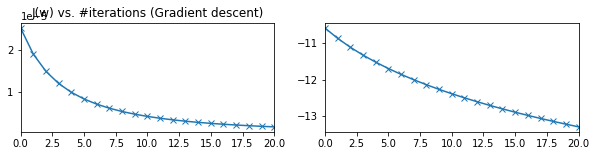

In [225]:
alpha = 0.03

w = copy.deepcopy(w0)
w /= np.linalg.norm(w)

Js = []
Js.append(J(w)[0,0])

for i in range(MAXITER):
    Dw = alpha*nablaJw(w)
    w -= Dw
    w /= np.linalg.norm(w)
    Js.append(J(w)[0,0])

plt.figure(figsize=(10,2))
plt.subplot(121)
plt.plot(Js, 'x-')
plt.xlim((0, MAXITER))
plt.title('J(w) vs. #iterations (Gradient descent)')


plt.subplot(122)
plt.plot(np.log(Js),'x-')
plt.xlim((0, MAXITER))

In [193]:
import sympy as sp
from sympy.abc import x

y = sp.log(sp.cosh(x))
y.diff(x)

sinh(x)/cosh(x)

In [171]:
y.diff(x).diff(x)

-sinh(x)**2/cosh(x)**2 + 1

sinh(x)/cosh(x)